# Text Mining Project MLDS - Subject 3

---
<b>Authors :</b> 
<li>FHIYIL SOUFIANE</li>
<li>MOUHDA MOHAMMED REDA</li>
<li>JAMAL AOURRAZ</li>

In [1150]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
import random

%matplotlib inline

## Create our dataset (Jeux de données)

---
#### read the data "NG5"

In [1151]:
from sklearn.datasets import fetch_20newsgroups

categories = [ 'rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'sci.space', 'talk.politics.mideast' ] 
ng5 = fetch_20newsgroups(categories=categories) 
documents = ng5.data

In [1152]:
ng5.target

array([2, 4, 0, ..., 0, 0, 4])

In [1153]:
len(documents)

2936

In [1154]:
documents_df = pd.DataFrame(np.c_[documents, ng5.target], columns=['document','target'])

In [1155]:
documents_df['index']=documents_df.index

In [1156]:
documents_df.head()

,document,target,index
0,From: tedward@cs.cornell.edu (Edward [Ted] Fis...,2,0
1,From: eshneken@ux4.cso.uiuc.edu (Edward A Shne...,4,1
2,From: u7711501@bicmos.ee.nctu.edu.tw (jih-shin...,0,2
3,From: jerry@sheldev.shel.isc-br.com (Gerald La...,2,3
4,From: arens@ISI.EDU (Yigal Arens)\nSubject: Mo...,4,4


#### Visualize lenght of documents

In [1157]:
lenghts = []
for d in documents:
    lenghts.append(len(d))

In [1158]:
T = range(0, len(documents))

In [1159]:
lenghts_data = pd.DataFrame(np.c_[T,lenghts],columns=['document','lenght'])

In [1160]:
len(T),len(lenghts)

(2936, 2936)

In [1161]:
lenghts_data.head()

,document,lenght
0,0,946
1,1,685
2,2,10216
3,3,1102
4,4,10644


[Text(0, 0.5, 'Lenght'),
 Text(0.5, 0, 'Document'),
 Text(0.5, 1.0, 'Lenght of documents')]

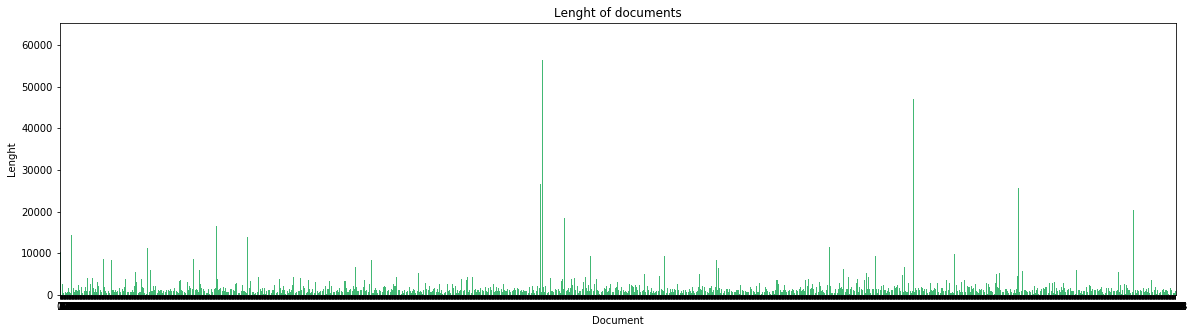

In [1162]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=lenghts_data, x="document",y="lenght", ax=ax, color="#2ECC71")
ax.set(xlabel='Document', ylabel='Lenght', title="Lenght of documents")

---
### Preprocessing & Tokenization

Before we can create lot of corpus from the original dataset, we should first preprocess the data and clean it, and then tokenize the documents in order to apply different approches for the creation of different corpus

##### Remove Abbreviations

In [1163]:
abbr_dict={
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",

    "i'm":"i am",
    "i'd":"i would",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",
    
    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",

    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",

    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
    '\s+':' ' # replace multi space with one single space
}

In [1164]:
documents_df.replace(abbr_dict, regex=True, inplace=True)

In [1165]:
stop = set(stopwords.words('english')) 
print(stop)

{'it', "wasn't", "you're", 'ma', 'during', 'his', 'before', 'wasn', 'mustn', 'don', 'as', 'o', 'ain', "aren't", 'their', 'is', 'down', 'any', 'if', "that'll", 'weren', 'doing', 're', 'about', 'up', 'both', 'above', 'these', 'had', 'below', 'yours', 'were', 'here', 'didn', 'further', 'doesn', 'where', 'he', 'you', "doesn't", 'our', "shan't", 'all', 'out', 'theirs', "you'll", 'after', 'other', 'm', 'there', 'won', 'do', 'only', "shouldn't", 'itself', 'wouldn', 'be', 'couldn', 'on', 'your', "won't", 'in', "mustn't", 'myself', 'am', 'whom', "needn't", 'into', 'once', 'until', 'then', 'so', 'why', 'at', "haven't", 'ourselves', 'now', 'for', 've', 'can', "should've", 't', 'of', 'himself', 'more', 'd', "it's", 'aren', 'we', 'again', 'some', "don't", 'll', "hadn't", 'they', 'haven', 'each', 'ours', 'such', 'its', 'few', 'y', "she's", 'my', "mightn't", 'between', 'than', 'hadn', 'are', 'her', 'same', 'him', 'has', "hasn't", "you've", 'over', 'which', 'or', 'an', 'who', 'nor', 'what', 'was', 'ju

In [1166]:
import re

temp =[]
snow = nltk.stem.SnowballStemmer('english')

for sentence in documents_df.document.values:
    sentence = sentence.lower()                                # Converting to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)                   # Removing HTML tags
    sentence = re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)          # Removing Punctuations
    sentence = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", sentence)  # Remove only integers
    sentence = re.sub('\W+',' ', sentence)                     # Remove special characters
    sentence = re.sub(r'\w*\d\w*', '', sentence).strip()       # Remove words containing both integer and string
    
    # Stemming && removing word less than 2 chars && removing stopwords
    words = [snow.stem(word) for word in sentence.split() if len(word) > 2 if word not in stopwords.words('english')]   
    
    temp.append(words)

In [1167]:
clean_documents_df = pd.DataFrame(np.c_[temp],columns=['document'])

In [1168]:
clean_documents_df.head()

,document
0,"[tedward, cornel, edu, edward, ted, fischer, s..."
1,"[eshneken, cso, uiuc, edu, edward, shnekendorf..."
2,"[bicmo, nctu, edu, jih, shin, subject, organ, ..."
3,"[jerri, sheldev, shel, isc, com, gerald, lanza..."
4,"[aren, isi, edu, yigal, aren, subject, adl, sp..."


#### join tokens of each document

In [1169]:
def join_tokens_corpus(corpus):
    new_corpus = []
    for document in corpus:
        new_corpus.append(' '.join(document))
    return new_corpus

In [1170]:
original_corpus = join_tokens_corpus(clean_documents_df.document.values)

In [1171]:
len(original_corpus)

2936

In [1172]:
del temp

---
### Apply different approaches to create many corpuses

#### Take words randomly from each document by a percentage %

In [1173]:
def create_corpus(corpus, percentage):
    temp = []
    for document in corpus:
        lenght = len(document)
        num_to_select = int(lenght * (percentage/100))
        temp.append(random.sample(document, num_to_select))
    return temp

In [1174]:
corpus_1 = create_corpus(clean_documents_df.document.values, percentage=30)

In [1175]:
corpus_1 = join_tokens_corpus(corpus_1)

In [1176]:
corpus_1 = pd.DataFrame(np.c_[documents_df.index, corpus_1,documents_df.target], 
                        columns=['index','document','target'])

In [1177]:
corpus_1.head()

,index,document,target
0,0,liber mat player mani back univ luriem trade t...,2
1,1,israel peac clock camp keep isra rule want wri...,4
2,2,borrow filenam emu find hex program escap syst...,0
3,3,shel shelton post would gerald sheldev receiv ...,2
4,4,leagu holocaust expert contract thousand prose...,4


In [1178]:
corpus_2 = create_corpus(clean_documents_df.document.values, percentage=60)

In [1179]:
corpus_2 = join_tokens_corpus(corpus_2)

In [1180]:
corpus_2 = pd.DataFrame(np.c_[documents_df.index, corpus_2,documents_df.target], 
                        columns=['index','document','target'])

In [1181]:
corpus_2.head()

,index,document,target
0,0,edu rooki five liber wrong team chronic cheer ...,2
1,1,justifi peac tim illinoi israel prerequisit mo...,4
2,2,differ peopl mirror img show color gif left ge...,0
3,3,fact file info secret find tate kind ago write...,2
4,4,base wealth francisco later aryan client pales...,4


In [1182]:
len(corpus_1),len(corpus_2)

(2936, 2936)

## Vectorization of documents

In [1183]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD


#set vectorizer
vectorizer = CountVectorizer()

#set tf-idf
tfidf = TfidfTransformer()


#set dimensionality reduction SVD
svd_model = TruncatedSVD(n_components=300, 
                         algorithm='randomized',
                         n_iter=10, random_state=0)

#init Pipeline
pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('tfidf', tfidf),
            ('svd', svd_model)
        ])

In [1184]:
#fit the pipeline
svd_matrix_1 = pipeline.fit_transform(corpus_1['document'])

In [1185]:
svd_matrix_1.shape

(2936, 300)

In [1186]:
#fit the pipeline
svd_matrix_2 = pipeline.fit_transform(corpus_2['document'])

In [1187]:
svd_matrix_2.shape

(2936, 300)

In [1188]:
from spherecluster import SphericalKMeans

In [1189]:
# Spherical K-Means clustering
skm = SphericalKMeans(n_clusters=5, init='k-means++', n_init=20)

print("Clustering with %s" % skm)
skm.fit(svd_matrix_1)

Clustering with SphericalKMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5,
        n_init=20, n_jobs=1, normalize=True, random_state=None, tol=0.0001,
        verbose=0)


SphericalKMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5,
        n_init=20, n_jobs=1, normalize=True, random_state=None, tol=0.0001,
        verbose=0)

In [1190]:
y_sphereKmeans_1 = skm.predict(svd_matrix_1)

In [1191]:
corpus_1['predicted_class'] = y_sphereKmeans_1

In [1192]:
corpus_1.head()

,index,document,target,predicted_class
0,0,liber mat player mani back univ luriem trade t...,2,0
1,1,israel peac clock camp keep isra rule want wri...,4,3
2,2,borrow filenam emu find hex program escap syst...,0,2
3,3,shel shelton post would gerald sheldev receiv ...,2,0
4,4,leagu holocaust expert contract thousand prose...,4,3


In [1193]:
# Spherical K-Means clustering
skm = SphericalKMeans(n_clusters=5, init='k-means++', n_init=20)

print("Clustering with %s" % skm)
skm.fit(svd_matrix_2)

Clustering with SphericalKMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5,
        n_init=20, n_jobs=1, normalize=True, random_state=None, tol=0.0001,
        verbose=0)


SphericalKMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5,
        n_init=20, n_jobs=1, normalize=True, random_state=None, tol=0.0001,
        verbose=0)

In [1194]:
y_sphereKmeans_2 = skm.predict(svd_matrix_2)

In [1195]:
corpus_2['predicted_class'] = y_sphereKmeans_2

In [1196]:
corpus_2.head()

,index,document,target,predicted_class
0,0,edu rooki five liber wrong team chronic cheer ...,2,4
1,1,justifi peac tim illinoi israel prerequisit mo...,4,2
2,2,differ peopl mirror img show color gif left ge...,0,1
3,3,fact file info secret find tate kind ago write...,2,4
4,4,base wealth francisco later aryan client pales...,4,2


In [1197]:
from sklearn.metrics.cluster import normalized_mutual_info_score

nmi_1 = normalized_mutual_info_score(corpus_1['target'], y_sphereKmeans_1, average_method='arithmetic')
nmi_1

0.5675893343152068

In [1198]:
nmi_2 = normalized_mutual_info_score(corpus_2['target'], y_sphereKmeans_2, average_method='arithmetic')
nmi_2

0.7615823071050626

In [1199]:
from coclust.evaluation.external import accuracy

In [1200]:
acc1 = accuracy(ng5.target, y_sphereKmeans_1)
acc1

0.7881471389645777

In [1201]:
acc2 = accuracy(ng5.target, y_sphereKmeans_2)
acc2

0.9076975476839237

### Comparison between different clustering results

In [1202]:
results = pd.DataFrame([['partition 1 -- 30% random words', nmi_1, acc1],
                        ['partition 2 -- 60% random words', nmi_2, acc2]],
                       columns=['Partitions','NMI', 'Accuracy (Coclust)'])
results

,Partitions,NMI,Accuracy (Coclust)
0,partition 1 -- 30% random words,0.567589,0.788147
1,partition 2 -- 60% random words,0.761582,0.907698


### Implementation of the Hungarian algorithm

In [1203]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.linear_assignment_ import linear_assignment

def changed_index(true_row_labels, predicted_row_labels):
    cm = confusion_matrix(true_row_labels, predicted_row_labels)
    indexes = linear_assignment(_make_cost_m(cm))
    return indexes
def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

In [1204]:
#Correspondance entre les classes réelles et les classes résultantes pour corpus 1 et 2
changed_index_1=changed_index(ng5.target, y_sphereKmeans_1)
changed_index_2=changed_index(ng5.target, y_sphereKmeans_2)
#Correspondance entre les classes résultantes du corpus 1 et les classes résultantes du corpus 2
changed_index_12=changed_index(y_sphereKmeans_2,y_sphereKmeans_1)

In [1205]:
changed_index_1

array([[0, 2],
       [1, 4],
       [2, 0],
       [3, 1],
       [4, 3]])

In [1206]:
changed_index_2

array([[0, 1],
       [1, 3],
       [2, 4],
       [3, 0],
       [4, 2]])

In [1207]:
changed_index_12

array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 4],
       [4, 0]])

# Ajout des classes ajustées selon les correspondances aux corpus

In [1208]:
def adjusted_classes(corpus,changed_index):
    for j in corpus['index']:
        for i in range(len(changed_index)):
            if (corpus.loc[j,'predicted_class']==changed_index[i,1]):
                corpus.loc[j,'adjusted_class']=changed_index[i,0]
                break
    corpus['adjusted_class']=pd.to_numeric(corpus['adjusted_class'], downcast='integer')
    corpus['predicted_class']=pd.to_numeric(corpus['predicted_class'], downcast='integer')
    corpus['target']=pd.to_numeric(corpus['target'], downcast='integer')
    return corpus

In [1209]:
#On crée un troisième corpus pour comparer les classes résultantes des deux corpus 1 et 2
#il contiendra les classes prédites du corpus 1 et leur ajustement par rapport aux classes du corpus 2
corpus_12=corpus_1[:]

In [1210]:
#Ajustement des classes résultantes des corpus 1 et 2 aux classes réelles
corpus_1=adjusted_classes(corpus_1,changed_index_1)
corpus_2=adjusted_classes(corpus_2,changed_index_2)

In [1211]:
#Ajustement des classes résultantes du corpus 1 à celles du corpus 2
corpus_12=adjusted_classes(corpus_12,changed_index_12)

In [1212]:
#On ajoute les classes prédites du corpus 2 au troisième corpus
corpus_12['predicted_class_2']=corpus_2['predicted_class']

# Identification des documents mal classés

In [1213]:
def changed_docs_target(corpus):
    return corpus[corpus['target']!=corpus['adjusted_class']]

In [1214]:
changed_docs_corpus_1=changed_docs_target(corpus_1)
changed_docs_corpus_2=changed_docs_target(corpus_2)

In [1222]:
len(changed_docs_corpus_1)

622

In [1223]:
changed_docs_corpus_1.head(20)

,index,document,target,predicted_class,adjusted_class
9,9,newsgroup emeri signatur rest made write read ...,2,3,4
10,10,razi line discuss manag mohammad upon agre edu...,4,2,0
23,23,surpris post chaotic jockey develop poster rel...,3,4,1
28,28,heaton would host jhuvm figur post miller buck...,2,2,0
30,30,california stolen serial subject summari light...,1,2,0
32,32,nntp end harley best bar azw harley jump woodw...,1,2,0
35,35,eric met com gerald lanza pennant eric astro s...,2,4,1
36,36,know strang invit edu event subject world carl...,4,2,0
38,38,gov subject articl without green corpor bruce ...,1,1,3
41,41,univers ken like back organ news delino well c...,2,2,0


In [1224]:
len(changed_docs_corpus_2)

271

In [1225]:
changed_docs_corpus_2.head(20)

,index,document,target,predicted_class,adjusted_class
9,9,adob sherri subject taunt file languag ethan p...,2,1,0
10,10,upon subject news essenti fundament fundamenta...,4,1,0
18,18,martin innovis rimar went organ mag network vi...,0,4,2
23,23,group larg softwar safeti subject extra servic...,3,1,0
46,46,link realiti virtual cloth lit far dig sell mi...,0,3,1
62,62,point fund post anybodi moratorium contest wit...,3,1,0
95,95,alphalpha uucp cosmo nntp news frank gateway d...,4,1,0
100,100,stat mail mail server thank immens memori uc o...,2,1,0
109,109,israel feygin toronto shortwav subject languag...,4,1,0
118,118,tandem send proprietari system line tns specia...,3,1,0


# Identification des documents dont la classification diffère 

In [1218]:
def changed_docs_12(corpus):
    return corpus[corpus['adjusted_class']!=corpus['predicted_class_2']]

In [1219]:
changed_docs_corpus_12=changed_docs_12(corpus_12)

In [1220]:
len(changed_docs_corpus_12)

514

In [1221]:
changed_docs_corpus_12.head(20)

,index,document,target,predicted_class,adjusted_class,predicted_class_2
9,9,newsgroup emeri signatur rest made write read ...,2,3,2,1
18,18,viewson sigma mine beauti imho subject bolero ...,0,2,1,4
23,23,surpris post chaotic jockey develop poster rel...,3,4,3,1
28,28,heaton would host jhuvm figur post miller buck...,2,2,1,4
30,30,california stolen serial subject summari light...,1,2,1,3
32,32,nntp end harley best bar azw harley jump woodw...,1,2,1,3
35,35,eric met com gerald lanza pennant eric astro s...,2,4,3,4
36,36,know strang invit edu event subject world carl...,4,2,1,2
38,38,gov subject articl without green corpor bruce ...,1,1,0,3
41,41,univers ken like back organ news delino well c...,2,2,1,4
